# Stationary 10-Armed Bandit: UCB vs Epsilon-Greedy

**Problem Setup:**
- 10 actions with fixed true values q*(a) (stationary)
- Rewards: R ~ N(q*(a), 1)
- Optimal action: highest q*(a)

**Experiments:**
1. UCB (Upper Confidence Bound): Qn(a) + sqrt(2*ln(n)/nj)
2. Epsilon-Greedy: Qn(a) with ε-exploration

**Parameters:** 500 runs, 10,000 steps, sample average for Qn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  

In [ ]:
class StationaryBandit:    
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        # Fixed true action values (sampled from N(0, 1))
        self.q_true = np.random.normal(0, 1, n_arms)
    
    def reward(self, action):
        # Return reward: N(q*(a), 1)
        return np.random.normal(self.q_true[action], 1)
    
    def optimal_action(self):
        # Highest true value action
        return np.argmax(self.q_true)

In [3]:
def run_ucb(steps=10000, runs=500):
    """
    UCB algorithm: Qn(a) + sqrt(2*ln(n)/nj)
    where n = total steps, nj = times arm j selected
    """
    n_arms = 10
    avg_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for run in range(runs):
        bandit = StationaryBandit(n_arms)
        Q = np.zeros(n_arms)       # Estimated values
        N = np.zeros(n_arms)       # Action counts
        
        for t in range(steps):
            # UCB action selection: argmax[Q(a) + confidence_bonus]
            ucb_values = Q + np.sqrt(2 * np.log(t + 1) / (N + 1))
            action = np.argmax(ucb_values)
            
            # Get reward and update
            reward = bandit.reward(action)
            avg_rewards[t] += reward
            
            # Track optimal action
            if action == bandit.optimal_action():
                optimal_actions[t] += 1
            
            # Update Q estimate (sample average: α = 1/n)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
    
    return avg_rewards / runs, optimal_actions / runs

In [4]:
def run_epsilon_greedy(epsilon=0.1, steps=10000, runs=500):
    """
    Epsilon-greedy algorithm: uses Qn(a) for action selection
    """
    n_arms = 10
    avg_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)
    
    for run in range(runs):
        bandit = StationaryBandit(n_arms)
        Q = np.zeros(n_arms)       # Estimated values
        N = np.zeros(n_arms)       # Action counts
        
        for t in range(steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.randint(n_arms)  # Explore
            else:
                action = np.argmax(Q)  # Exploit
            
            # Get reward and update
            reward = bandit.reward(action)
            avg_rewards[t] += reward
            
            # Track optimal action
            if action == bandit.optimal_action():
                optimal_actions[t] += 1
            
            # Update Q estimate (sample average: α = 1/n)
            N[action] += 1
            Q[action] += (reward - Q[action]) / N[action]
    
    return avg_rewards / runs, optimal_actions / runs

In [5]:
# Run Experiment 1: UCB
print("Running UCB (Exp1)...")
rewards_ucb, optimal_ucb = run_ucb(steps=10000, runs=500)

# Run Experiment 2: Epsilon-Greedy (with ε=0.1)
print("Running Epsilon-Greedy (Exp2)...")
rewards_eg, optimal_eg = run_epsilon_greedy(epsilon=0.1, steps=10000, runs=500)

print("Done!")

Running UCB (Exp1)...
Running Epsilon-Greedy (Exp2)...
Done!


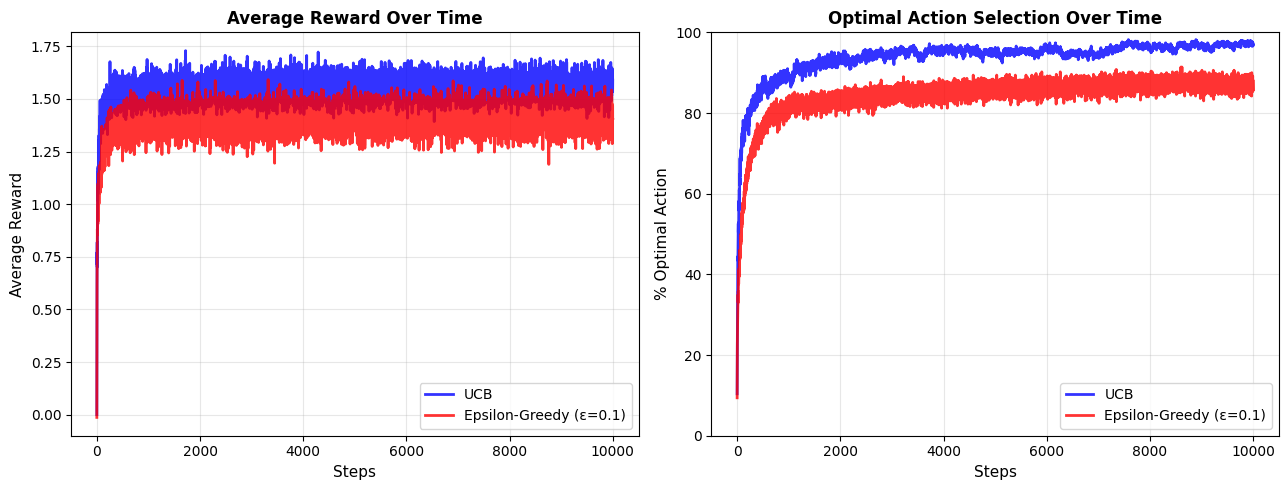

In [6]:
# Plot 1 & 2: Comparison of both experiments
plt.figure(figsize=(13, 5))

# Plot 1: Average Reward
plt.subplot(1, 2, 1)
plt.plot(rewards_ucb, label='UCB', color='blue', linewidth=2, alpha=0.8)
plt.plot(rewards_eg, label='Epsilon-Greedy (ε=0.1)', color='red', linewidth=2, alpha=0.8)
plt.xlabel('Steps', fontsize=11)
plt.ylabel('Average Reward', fontsize=11)
plt.title('Average Reward Over Time', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot 2: % Optimal Action
plt.subplot(1, 2, 2)
plt.plot(optimal_ucb * 100, label='UCB', color='blue', linewidth=2, alpha=0.8)
plt.plot(optimal_eg * 100, label='Epsilon-Greedy (ε=0.1)', color='red', linewidth=2, alpha=0.8)
plt.xlabel('Steps', fontsize=11)
plt.ylabel('% Optimal Action', fontsize=11)
plt.title('Optimal Action Selection Over Time', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('exp_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Test different epsilon values for Epsilon-Greedy
# Measure average reward at final 100 steps
epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
final_rewards_eg = []

print("Testing different epsilon values for Epsilon-Greedy...")
for eps in epsilon_values:
    print(f"  ε = {eps}")
    rewards, _ = run_epsilon_greedy(epsilon=eps, steps=10000, runs=500)
    final_rewards_eg.append(np.mean(rewards[-100:]))  # Average of last 100 steps

print("Done!")

Testing different epsilon values for Epsilon-Greedy...
  ε = 0.01
  ε = 0.05
  ε = 0.1
  ε = 0.2
  ε = 0.3
  ε = 0.5
Done!


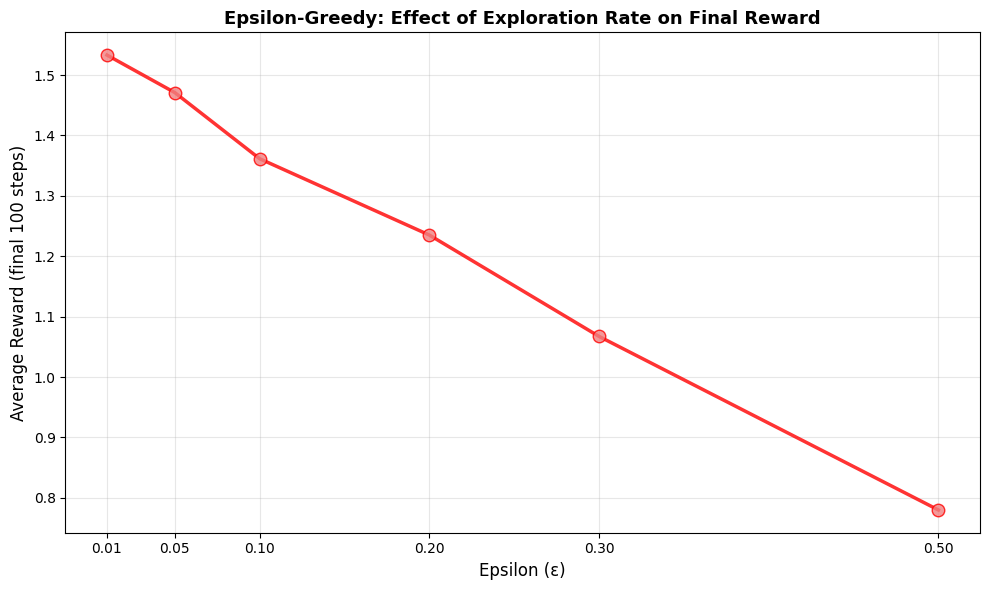

In [8]:
# Plot 3: Epsilon Sensitivity for Epsilon-Greedy
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, final_rewards_eg, marker='o', linewidth=2.5, 
         markersize=9, color='red', alpha=0.8, markerfacecolor='lightcoral')
plt.xlabel('Epsilon (ε)', fontsize=12)
plt.ylabel('Average Reward (final 100 steps)', fontsize=12)
plt.title('Epsilon-Greedy: Effect of Exploration Rate on Final Reward', 
          fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(epsilon_values)
plt.tight_layout()
plt.savefig('epsilon_sensitivity.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Summary Statistics
print("\n" + "="*70)
print("RESULTS SUMMARY")
print("="*70)

print("\nExperiment 1: UCB")
print(f"  Average Reward (overall): {np.mean(rewards_ucb):.3f}")
print(f"  Average Reward (final 100 steps): {np.mean(rewards_ucb[-100:]):.3f}")
print(f"  % Optimal Actions: {np.mean(optimal_ucb)*100:.2f}%")

print("\nExperiment 2: Epsilon-Greedy (ε=0.1)")
print(f"  Average Reward (overall): {np.mean(rewards_eg):.3f}")
print(f"  Average Reward (final 100 steps): {np.mean(rewards_eg[-100:]):.3f}")
print(f"  % Optimal Actions: {np.mean(optimal_eg)*100:.2f}%")

print("\nEpsilon Sensitivity Analysis (Epsilon-Greedy):")
print(f"  {'Epsilon':<10} {'Final Reward':<15}")
print(f"  {'-'*25}")
for eps, reward in zip(epsilon_values, final_rewards_eg):
    print(f"  {eps:<10.2f} {reward:<15.3f}")

print("\n" + "="*70)


RESULTS SUMMARY

Experiment 1: UCB
  Average Reward (overall): 1.547
  Average Reward (final 100 steps): 1.561
  % Optimal Actions: 93.80%

Experiment 2: Epsilon-Greedy (ε=0.1)
  Average Reward (overall): 1.400
  Average Reward (final 100 steps): 1.409
  % Optimal Actions: 84.29%

Epsilon Sensitivity Analysis (Epsilon-Greedy):
  Epsilon    Final Reward   
  -------------------------
  0.01       1.533          
  0.05       1.471          
  0.10       1.361          
  0.20       1.235          
  0.30       1.067          
  0.50       0.780          

